In [ ]:
### https://www.kaggle.com/dmitrijsovetov

In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import r2_score as r2
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d.axes3d import Axes3D
import seaborn as sns
%matplotlib inline

In [2]:
matplotlib.rcParams.update({'font.size': 12})

In [3]:
TRAIN_DATASET_PATH = './train.csv'
TEST_DATASET_PATH = './test.csv'

df = pd.read_csv(TRAIN_DATASET_PATH, ',')
df.head()
df_test = pd.read_csv(TEST_DATASET_PATH, ',')

In [4]:
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808


In [5]:
df_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A


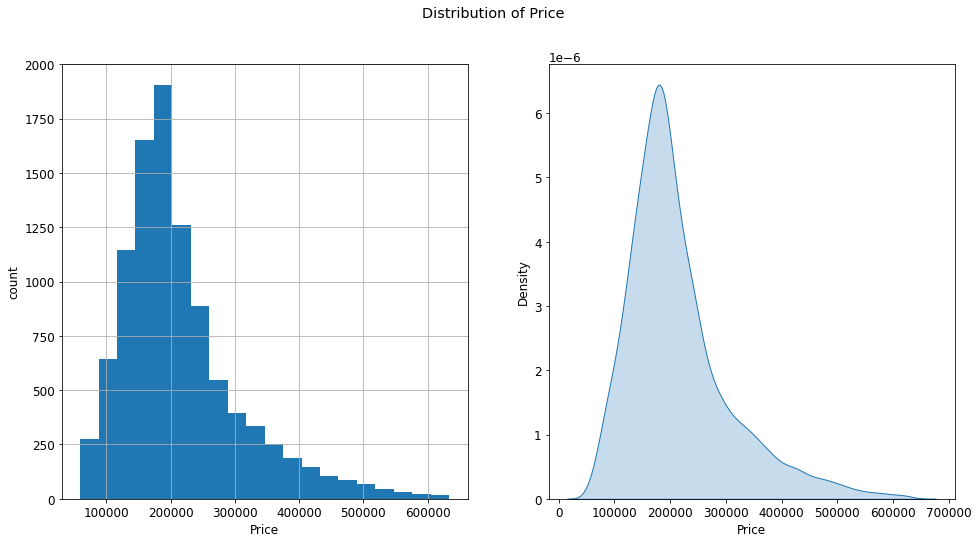

In [6]:
### Посмотрим распределение целевой переменной
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['Price'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

In [7]:
df.loc[df['Ecology_2'] == 'B', 'Ecology_2'] = 1
df.loc[df['Ecology_2'] == 'A', 'Ecology_2'] = 0
df.loc[df['Ecology_3'] == 'B', 'Ecology_3'] = 1
df.loc[df['Ecology_3'] == 'A', 'Ecology_3'] = 0
df.loc[df['Shops_2'] == 'B', 'Shops_2'] = 1
df.loc[df['Shops_2'] == 'A', 'Shops_2'] = 0

In [8]:
df_test.loc[df_test['Ecology_2'] == 'B', 'Ecology_2'] = 1
df_test.loc[df_test['Ecology_2'] == 'A', 'Ecology_2'] = 0
df_test.loc[df_test['Ecology_3'] == 'B', 'Ecology_3'] = 1
df_test.loc[df_test['Ecology_3'] == 'A', 'Ecology_3'] = 0
df_test.loc[df_test['Shops_2'] == 'B', 'Shops_2'] = 1
df_test.loc[df_test['Shops_2'] == 'A', 'Shops_2'] = 0

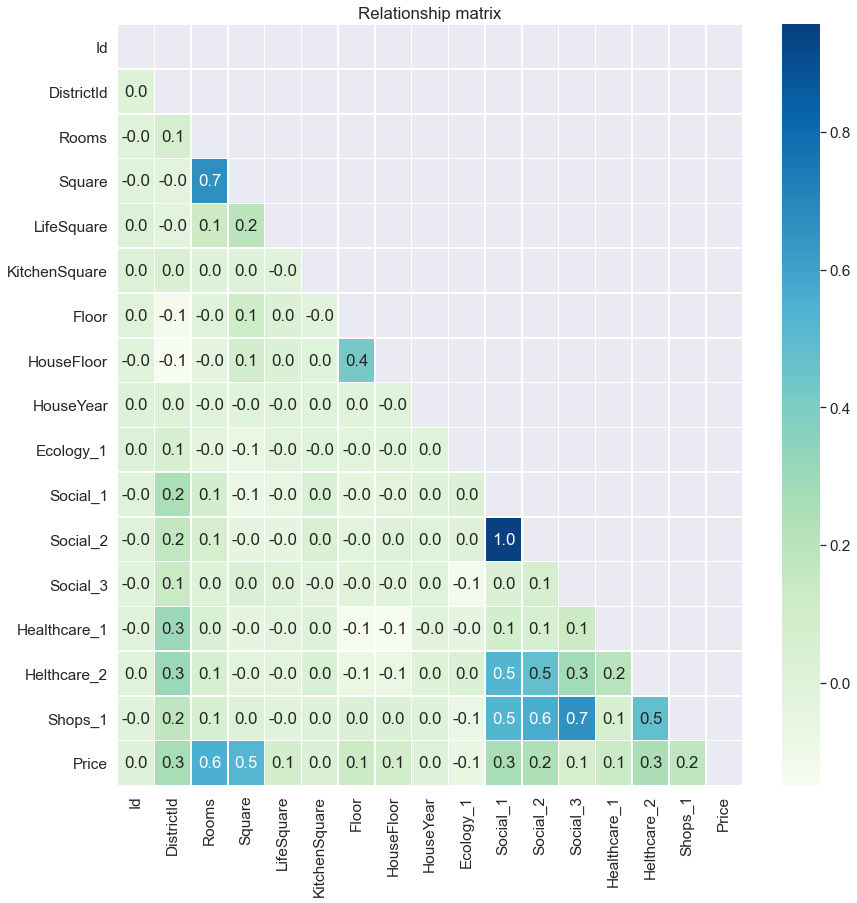

In [9]:
### Посмотрим взаимосвязь признаков
corr = df.corr()
plt.figure(figsize = (14, 14))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1.4)
sns.heatmap(df.corr(),mask = mask, annot=True, fmt='.1f', linewidths=.5, cmap='GnBu')
plt.title('Relationship matrix')
plt.show()

In [10]:
### Наибольший вес в цене имеют следующие признаки : Rooms,Square.
### Взглянем на эти признаки.

In [11]:
df['Rooms'].value_counts()  ### Видим выбросы : 0, 10,19

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [12]:
df.loc[df['Rooms']>5] 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,1,1,74,19083,2,NaN,5,15,1,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,1,1,1,264,0,NaN,0,1,1,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,1,1,66,10573,1,1322.0,3,8,1,229661.964416
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,1,1,25,5648,1,30.0,2,4,1,172329.270863


In [13]:
df.loc[df['Rooms']==0] 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,1,1,11,3097,0,NaN,0,0,1,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,1,1,9,1892,0,NaN,0,1,1,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,1,1,9,1892,0,NaN,0,1,1,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,1,1,30,6207,1,1183.0,1,0,1,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,1,1,5,1564,0,540.0,0,0,1,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,1,1,2,469,0,NaN,0,0,1,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,1,1,43,8429,3,NaN,3,9,1,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,1,1,9,1892,0,NaN,0,1,1,219281.918007


In [14]:
df.at[df.query('Rooms == 0').index, 'Rooms'] = 1
df.at[df.query('Rooms > 5').index, 'Rooms'] = 2

In [15]:
df_test.at[df.query('Rooms == 0').index, 'Rooms'] = 1
df_test.at[df.query('Rooms > 5').index, 'Rooms'] = 2

In [16]:
df.loc[df['Square']< 1] ### Выбросов нет

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [17]:
df.loc[df['Square']> 200] 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1981,7917,27,1.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,1,1,9,1892,0,NaN,0,1,1,302211.260887
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,1,0,31,7010,5,4508.0,3,7,1,455264.882666
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,1,1,25,5648,1,30.0,2,4,1,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,1,1,26,3889,6,705.0,3,6,1,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,1,1,22,6398,141,1046.0,3,23,1,133529.681562
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,1,1,53,14892,4,NaN,1,4,1,528560.506016


In [18]:
### Заполним пропуски Heathcare_1
rfc = RandomForestClassifier(n_estimators=2000,random_state = 100, min_samples_leaf=3,
                      min_samples_split=8, n_jobs = -1)
df_copy = df.copy()
df_rfc_preds = df_copy[['Ecology_1','Social_1','Social_2','Social_3','DistrictId']]
df_rfc_preds

,Ecology_1,Social_1,Social_2,Social_3,DistrictId
0,0.089040,33,7976,5,35
1,0.000070,46,10309,1,41
2,0.049637,34,7759,0,53
3,0.437885,23,5735,3,58
4,0.012339,35,5776,1,99
...,...,...,...,...,...
9995,0.135650,46,7960,6,32
9996,0.000000,30,5562,0,18
9997,0.072158,2,629,1,27
9998,0.307467,30,5048,9,75


In [19]:
df_copy = df_copy.dropna()
df_copy

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.0,1,3,1,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,1,1,35,7715,4,990.0,0,6,1,215898.447742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,15233,1,3.0,57.373889,39.688445,5.0,2,5.0,1962,0.036270,1,1,6,1318,1,200.0,1,1,1,163807.542987
9991,11553,3,3.0,101.622794,51.628780,12.0,18,17.0,2000,0.265089,1,1,37,5288,0,1937.0,3,2,1,212883.501504
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,1,1,46,7960,6,350.0,3,11,1,196684.316040
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,1,0,30,5048,9,325.0,2,5,1,181595.339808


In [20]:
df_rfc_y = df_copy['Healthcare_1']

In [21]:
df_rfc_X_test = df_test[['Ecology_1','Social_1','Social_2','Social_3','DistrictId']]

In [22]:
df_rfc_X = df_copy[['Ecology_1','Social_1','Social_2','Social_3','DistrictId']]
df_rfc_X

,Ecology_1,Social_1,Social_2,Social_3,DistrictId
1,0.000070,46,10309,1,41
2,0.049637,34,7759,0,53
3,0.437885,23,5735,3,58
4,0.012339,35,5776,1,99
5,0.309479,35,7715,4,59
...,...,...,...,...,...
9990,0.036270,6,1318,1,1
9991,0.265089,37,5288,0,3
9995,0.135650,46,7960,6,32
9998,0.307467,30,5048,9,75


In [23]:
model_rfc = rfc.fit(df_rfc_X, df_rfc_y)
model_rfc_preds = model_rfc.predict(df_rfc_preds)

In [24]:
model_rfc_preds_test = model_rfc.predict(df_rfc_X_test)

In [25]:
model_rfc_preds_DF = pd.DataFrame(model_rfc_preds)
model_rfc_preds_test_DF = pd.DataFrame(model_rfc_preds_test)


Feature: 0, Score: 0.22918
Feature: 1, Score: 0.27995
Feature: 2, Score: 0.26690
Feature: 3, Score: 0.16247
Feature: 4, Score: 0.06149


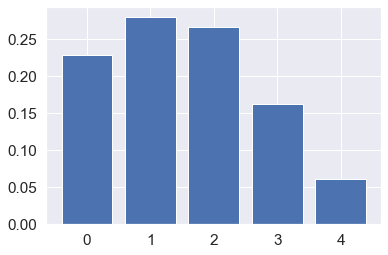

In [26]:
importance = rfc.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [27]:
df['Healthcare_1'] = model_rfc_preds_DF
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,990.0,0,11,1,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.0,1,3,1,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,1,1,46,7960,6,350.0,3,11,1,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,1,1,30,5562,0,645.0,0,5,0,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,1,1,2,629,1,540.0,0,0,0,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,1,0,30,5048,9,325.0,2,5,1,181595.339808


In [28]:
df_test['Healthcare_1'] = model_rfc_preds_test_DF
df_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1,1,11,2748,1,32.0,0,0,1
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,1,1,6,1437,3,1547.0,0,2,1
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1,1,23,4583,3,3300.0,3,3,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,1,1,2,629,1,540.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,1,1,36,5992,0,2078.0,1,1,1
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,1,1,1,264,0,540.0,0,1,1
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,1,1,74,19083,2,1322.0,5,15,1
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,1,1,2,629,1,540.0,0,0,0


In [29]:
### Добавим новый признак - цену за квадратный метр по DistrictId
df['Prc_per_sqr'] = df['Price']/df['Square']   
Prc_per_sqr = df.groupby('DistrictId')[['Prc_per_sqr']].median().reset_index()
df = df.drop('Prc_per_sqr', axis = 1)
Prc_per_sqr

,DistrictId,Prc_per_sqr
0,0,3935.906409
1,1,3251.647396
2,2,4550.709250
3,3,3892.203737
4,4,5716.888354
...,...,...
200,202,7447.527733
201,205,5101.016598
202,207,5550.678339
203,208,8005.605047


In [30]:
df = pd.merge(df, Prc_per_sqr, how = 'left', on = 'DistrictId')


In [31]:
df_test = pd.merge(df_test, Prc_per_sqr, how = 'left', on = 'DistrictId')
df_test
df_test['Prc_per_sqr'] = df_test['Prc_per_sqr'].fillna(df_test['Prc_per_sqr'].median())

In [32]:
df_test['Prc_per_sqr'].isna().value_counts()

False    5000
Name: Prc_per_sqr, dtype: int64

In [33]:
df_num_features = df.select_dtypes(include=['float64','int64','float32', 'float16', 'int16', 'int8','category','object'])
df_num_features.drop(['LifeSquare','Id'], axis=1, inplace=True)
df_num_features.drop('Price', axis=1, inplace=True)
df_num_features.info()
df_X =df_num_features 
df_y = df['Price'] 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   KitchenSquare  10000 non-null  float64
 4   Floor          10000 non-null  int64  
 5   HouseFloor     10000 non-null  float64
 6   HouseYear      10000 non-null  int64  
 7   Ecology_1      10000 non-null  float64
 8   Ecology_2      10000 non-null  object 
 9   Ecology_3      10000 non-null  object 
 10  Social_1       10000 non-null  int64  
 11  Social_2       10000 non-null  int64  
 12  Social_3       10000 non-null  int64  
 13  Healthcare_1   10000 non-null  float64
 14  Helthcare_2    10000 non-null  int64  
 15  Shops_1        10000 non-null  int64  
 16  Shops_2        10000 non-null  object 
 17  Prc_per_sqr    10000 non-null  float64
dtypes: floa

In [34]:
df_test_num_features = df_test.select_dtypes(include=['float64','int64','float32', 'float16', 'int16', 'int8','category','object'])
df_test_num_features.drop(['LifeSquare', 'Id'], axis=1, inplace=True)
df_test_num_features.info()
df_X_test = df_test_num_features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   KitchenSquare  5000 non-null   float64
 4   Floor          5000 non-null   int64  
 5   HouseFloor     5000 non-null   float64
 6   HouseYear      5000 non-null   int64  
 7   Ecology_1      5000 non-null   float64
 8   Ecology_2      5000 non-null   object 
 9   Ecology_3      5000 non-null   object 
 10  Social_1       5000 non-null   int64  
 11  Social_2       5000 non-null   int64  
 12  Social_3       5000 non-null   int64  
 13  Healthcare_1   5000 non-null   float64
 14  Helthcare_2    5000 non-null   int64  
 15  Shops_1        5000 non-null   int64  
 16  Shops_2        5000 non-null   object 
 17  Prc_per_sqr    5000 non-null   float64
dtypes: float

In [35]:
price = pd.DataFrame()
price['Id'] = df_test['Id'].copy() 
price

,Id
0,725
1,15856
2,5480
3,15664
4,14275
...,...
4995,8180
4996,4695
4997,5783
4998,4780


In [36]:
model = RandomForestRegressor(bootstrap=True,
 max_depth= 15,                            
 max_features = 7,
 min_samples_leaf=3,
 min_samples_split=8,
 n_estimators = 30000,
 n_jobs = -1)  

In [37]:
model.fit(df_X, df_y)

RandomForestRegressor(max_depth=15, max_features=7, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=30000, n_jobs=-1)

In [38]:
y_pred = model.predict(df_X_test)

In [39]:
price['Price'] = y_pred

In [40]:
price.to_csv('predictions_sovetov_D_ver_1.csv', index=False)

In [41]:
### Время выполнения 3:30    Проц - Intel 6600k, 8Gb RAM DDR4 2000